In [40]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from scipy.io.arff import loadarff
from scipy.stats import ttest_rel

# Load data
data = loadarff('data/pd_speech.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')

X = df.drop('class', axis=1)
y = df['class']

In [41]:
# Create 10-fold stratified cross validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# Create classifiers
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='euclidean')
nb = GaussianNB()

knn_cm = np.zeros((2, 2))
nb_cm = np.zeros((2, 2))

knn_scores = np.array([])
nb_scores = np.array([])

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    knn.fit(X_train, y_train)
    nb.fit(X_train, y_train)

    knn_pred = knn.predict(X_test)
    nb_pred = nb.predict(X_test)

    # used in the first question
    knn_cm += confusion_matrix(y_test, knn_pred)
    nb_cm += confusion_matrix(y_test, nb_pred)

    # used in the second question
    knn_scores = np.append(knn_scores, accuracy_score(y_test, knn_pred))
    nb_scores = np.append(nb_scores, accuracy_score(y_test, nb_pred))

In [42]:
def first():
  """Used to answer the first question"""
  group_names =['TN', 'FP', 'FN', 'TP']
  knn_labels = np.asarray(
    [f"{name}\n{count}" for name, count in zip(group_names, knn_cm.flatten())]
  ).reshape(2, 2)
  nb_labels = np.asarray(
    [f"{name}\n{count}" for name, count in zip(group_names, nb_cm.flatten())]
  ).reshape(2, 2)
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
  p1 = sns.heatmap(knn_cm, annot=knn_labels, cmap='Blues', fmt='', ax=ax1)
  p2 = sns.heatmap(nb_cm, annot=nb_labels, cmap='Blues', fmt='', ax=ax2)
  p1.set_title('KNN Confusion Matrix')
  p2.set_title('Naive Bayes Confusion Matrix')
  plt.show(p1)
  # save the plot to a file
  fig.savefig('assets/hw2-2.1.png')

def second():
  """Used to answer the second question"""
  # the test below calculates whether nb is better than knn
  return ttest_rel(knn_scores, nb_scores, alternative='less')

# First Programming Question

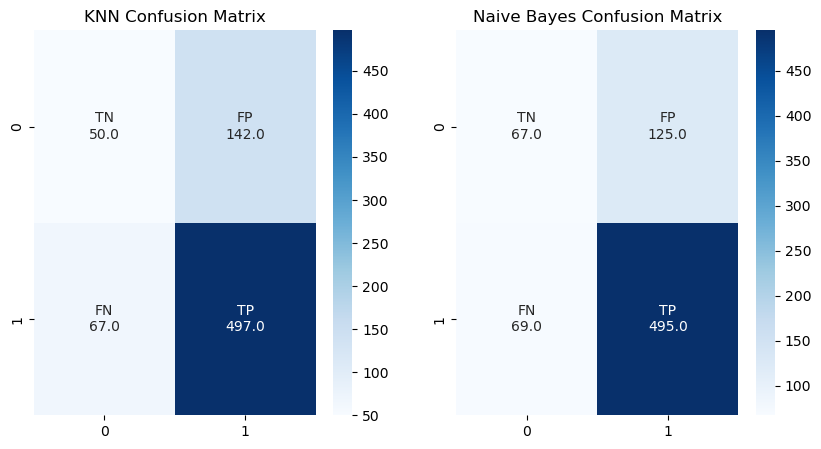

In [43]:
first()

# Second Programming Question

In [44]:
results = second()
print("KNN worse than NB?\np-value = {}\nt-statistic = {}".format(results.pvalue, results.statistic))

KNN worse than NB?
p-value = 0.08955230012484414
t-statistic = -1.45699523678738


With an associated p-value of around 8.9%, we can reject the null hypothesis for a significance level of 10%, meaning that KNN is, in fact, statistically inferior to the Naive Bayes (regarding accuracy).